This page is used to answer three main questions using Stackoverflow data. 
• How has the salary changed over the years and what has had the biggest influence on the salary
• What does the data tell us about the average Stackoverflow programmer?
• ?


In [899]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import distutils.util as util
import numpy as np
from collections import Counter
from matplotlib.font_manager import FontProperties
import os
from re import split
%matplotlib inline

In [525]:
# read in the data from data folder
def read_in_data():
    data_dict = {}
    suffix=".csv"
    filenames = os.listdir(r"C:\Users\Savo\Code\Project-1\Survey_results")
    filenameslist = [ filename for filename in filenames if filename.endswith( suffix ) ]
    for file in filenameslist:
        year = split('[|_| .| ]| ' , file)[2]
        data = pd.read_csv(r"C:\Users\Savo\Code\Project-1\Survey_results\{}".format(file),encoding='latin1')
        data_dict[year] = data
    return data_dict

# Declare universal variables 
years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
languages = ['Java', 'JavaScript', 'CSS', 'PHP', 'Python', 'Ruby', 'SQL', 'C#', 'C++', 'C', 'Perl', 'None', 'Other']

# Rplace column headers with first row for years 2011 to 2014 
def replace_header():
    for year in years[0:5]:
        new_headers = list(data_dict[year].iloc[0])
        data_dict[year] = data_dict[year][1:]
        data_dict[year].columns = new_headers


data_dict = read_in_data()
replace_header()

C:\Users\Savo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (46,48,62) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Savo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\Savo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [526]:
# Get language columns 2015

cols = data_dict['2015'].columns
language_columns_2015 = []
def get_language_columns_2015():
    for col in cols:
        for language in languages:
            if language in col and 'Current Lang & Tech' in col: 
                language_columns_2015.append(col)
    return np.unique(language_columns_2015)

In [527]:
# Get language columns for 2011 to 2014 dataframe

def add_language_column_2011_2014():
    for year in years[0:4]:
        data_dict[year]['languages_worked_on'] = ""
        for i in list(data_dict[year].index):
            languages_worked_on = []
            for language in languages: 
                if language in data_dict[year].columns:
                    try: 
                        if data_dict[year].loc[i, [language]].notna().any():
                            languages_worked_on.append(''.join(language.split()))
                    except Exception as e: 
                        print('Row: {} Language: {} year: {} error: {}'.format(i, language, year, e))
            languages_worked_on = ';'.join(languages_worked_on)
            data_dict[year].loc[i, ['languages_worked_on']] = languages_worked_on


In [528]:
# Add languages worked on column to 2015 dataset

def add_language_columns_2015():
    language_columns_2015 = get_language_columns_2015()
    data_dict['2015']['languages_worked_on'] = ""
    for i in list(data_dict['2015'].index):
        languages_worked_on = []
        for col in language_columns_2015:
            language = col.split(':')[1]
            if data_dict['2015'].loc[i, [col]].notna().any():
                languages_worked_on.append(language)
        languages_worked_on = ';'.join(languages_worked_on)
        data_dict['2015'].loc[i, ['languages_worked_on']] = languages_worked_on
                

In [536]:
data_dict['2016'].rename(columns={"tech_do": "languages_worked_on"}, inplace=True)
data_dict['2017'].rename(columns={"HaveWorkedLanguage": "languages_worked_on"}, inplace=True)
data_dict['2018'].rename(columns={"LanguageWorkedWith": "languages_worked_on"}, inplace=True)
data_dict['2019'].rename(columns={"LanguageWorkedWith": "languages_worked_on"}, inplace=True)
add_language_column_2011_2014()
add_language_columns_2015()

In [537]:
# Question 1: How has the programming language most used change over the years?

languages_dict = {}
for year in years:
    new_lang = []
    for row in data_dict[year].index[1:200]:
        new_lang.extend(data_dict[year].loc[row, ['languages_worked_on']].to_string(index = False).split(';'))
    new_lang = [''.join(l.split()) for l in new_lang]
    counter = Counter(new_lang)
    try: 
        del counter['NaN'] 
    except: 
        continue
    most_common =  dict(counter.most_common(8))
    most_common['Other'] = (sum(counter.values()) - sum(most_common.values()))
    factor = 1/sum(counter.values())
    most_common = {key:value*factor for key,value in most_common.items()}
    languages_dict[year] = most_common
   

In [904]:
# Have a look at the most populare languages per year
for year in years: 
    print('Year: ', year, '   Languages: ', list(languages_dict[year]))

Year:  2011    Languages:  ['SQL', 'JavaScript', 'CSS', 'Java', 'C#', 'C', 'PHP', 'C++', 'Other']
Year:  2012    Languages:  ['SQL', 'JavaScript', 'Java', 'CSS', 'C#', 'PHP', 'C++', 'C', 'Other']
Year:  2013    Languages:  ['JavaScript', 'SQL', 'Java', 'PHP', 'C#', 'Python', 'Other', 'C++']
Year:  2014    Languages:  ['JavaScript', 'SQL', '', 'C#', 'Java', 'PHP', 'C++', 'Other']
Year:  2015    Languages:  ['JavaScript', 'SQL', 'Java', 'C#', 'PHP', 'SQLServer', 'AngularJS', 'Android', 'Other']
Year:  2016    Languages:  ['JavaScript', 'SQL', 'PHP', 'Java', 'C#', 'AngularJS', 'Android', 'Python', 'Other']
Year:  2017    Languages:  ['JavaScript', 'SQL', 'Java', 'C#', 'Python', 'PHP', 'C++', 'C', 'Other']
Year:  2018    Languages:  ['JavaScript', 'HTML', 'SQL', 'CSS', 'Java', 'C#', 'Python', 'PHP', 'Other']
Year:  2019    Languages:  ['HTML/CSS', 'JavaScript', 'SQL', 'Java', 'Bash/Shell/PowerShell', 'C#', 'C++', 'Python', 'Other']


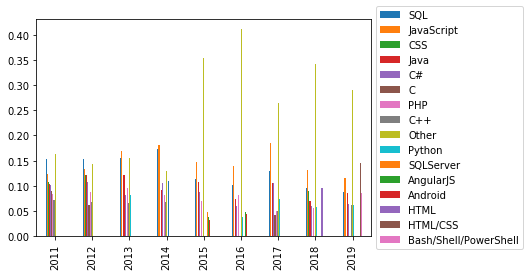

In [898]:
# Plot results 
def plot_common_languages():
    pd.DataFrame(languages_dict).T.plot(kind='bar')
    # Put a legend to the right of the current axis
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    
plot_common_languages()

In [591]:
# Answer question2: Is there a link between the programming languages and salary?
def add_number_of_languages_column():
    for year in years:
        for row in data_dict[year].index:
            lang = data_dict[year].loc[row, ['languages_worked_on']].to_string(index = False).split(';')
            if lang == [' '] or lang == [' NaN']: 
                nr_lang = 0
                data_dict[year].loc[row,['number_of_languages']] = nr_lang
            else: 
                nr_lang = len(lang)
                data_dict[year].loc[row, ['number_of_languages']] = nr_lang
add_number_of_languages_column()

In [885]:
df = data_dict['2019']
df =df.loc[(df['number_of_languages'] > 0 ) & (df['MainBranch'] == 'I am a developer by profession')] 
df = df.loc[df['Gender'].isin(['Man', 'Woman'])]
df.rename(columns = {'ConvertedComp' : 'Salary'}, inplace=True)


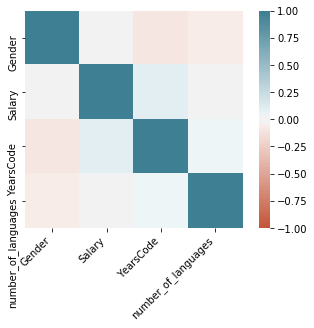

In [879]:
# Question 2: Meassure correlation between Salary, Gender, Years spent coding and number of programming languages used

df_corr = df[['Gender', 'Salary', 'YearsCode', 'number_of_languages']]
df_corr['Gender'][df_corr['Gender'] == 'Man'] = 0
df_corr['Gender'][df_corr['Gender'] == 'Woman'] = 1
df_corr['YearsCode'][df_corr['YearsCode'] == 'Less than 1 year'] = 0.5
df_corr['YearsCode'][df_corr['YearsCode'] == 'More than 50 years'] = 60

for col in df_corr.columns:
    df_corr[pd.to_numeric(df[col], errors='coerce').notnull()]
    df_corr[col] = df_corr[col].astype(float)
    
# Plot correlation matrix 
def plot_corr_matrix(df_corr):
    corr = df_corr.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );
    plt.savefig('CorrMatrix')
    
plot_corr_matrix(df_corr)

In [ ]:
# Question 3: Visualize the effect of education and programming as a hobby on Salary
df = data_dict['2019']
df = df.loc[df['Gender'].isin(['Man', 'Woman'])]
pd.DataFrame(df.query("MainBranch == 'I am a developer by profession' ").groupby(['Gender', 'EdLevel']).mean()['ConvertedComp'])